In [1]:
#import libraries
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,classification_report
from sklearn.metrics import average_precision_score,recall_score

In [2]:
#loading the dataset
churn_df = pd.read_excel('Telco_customer_churn.xlsx')

In [3]:
churn_df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


# 1.Data preparation

In [4]:
#checking the shape of the data
churn_df.shape

(7043, 33)

In [5]:
#getting general information about the data
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [6]:
#checking the columns
churn_df.columns.values

array(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score',
       'CLTV', 'Churn Reason'], dtype=object)

In [7]:
#checking the data types of the features
churn_df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [8]:
#converting total charges to numeric so that it is easy to analyse
churn_df['Total Charges'] = pd.to_numeric(churn_df['Total Charges'], errors='coerce')

## 1.1dealing the missing values

<AxesSubplot:>

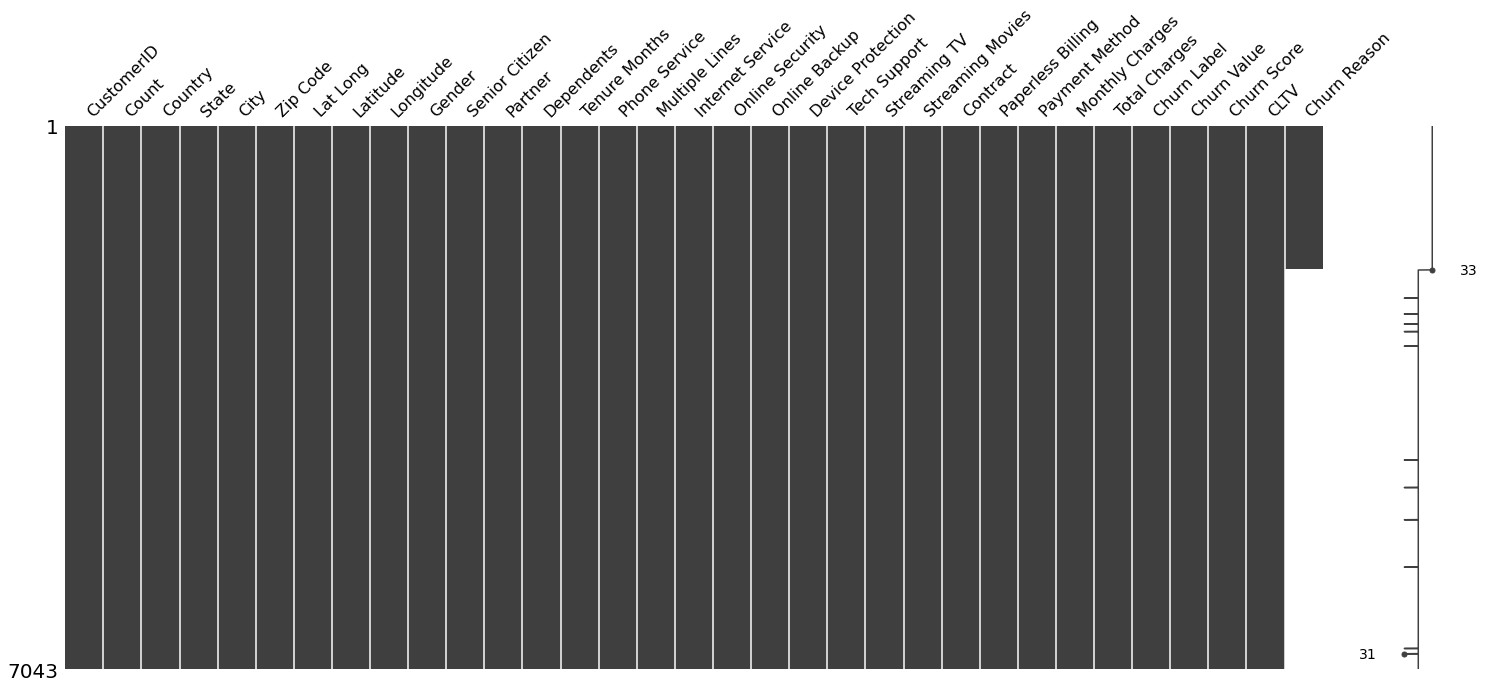

In [9]:
#visualising the features to find the missing values
msno.matrix(churn_df)

In [10]:
#checking the colums for missing values
churn_df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [11]:
# check for missing values in the Total charges column
churn_df[churn_df['Total Charges'].isnull()].T

,2234,2438,2568,2667,2856,4331,4687,5104,5719,6772,6840
CustomerID,4472-LVYGI,3115-CZMZD,5709-LVOEQ,4367-NUYAO,1371-DWPAZ,7644-OMVMY,3213-VVOLG,2520-SGTTA,2923-ARZLG,4075-WKNIU,2775-SEFEE
Count,1,1,1,1,1,1,1,1,1,1,1
Country,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
State,California,California,California,California,California,California,California,California,California,California,California
City,San Bernardino,Independence,San Mateo,Cupertino,Redcrest,Los Angeles,Sun City,Ben Lomond,La Verne,Bell,Wilmington
Zip Code,92408,93526,94401,95014,95569,90029,92585,95005,91750,90201,90744
Lat Long,"34.084909, -117.258107","36.869584, -118.189241","37.590421, -122.306467","37.306612, -122.080621","40.363446, -123.835041","34.089953, -118.294824","33.739412, -117.173334","37.078873, -122.090386","34.144703, -117.770299","33.970343, -118.171368","33.782068, -118.262263"
Latitude,34.084909,36.869584,37.590421,37.306612,40.363446,34.089953,33.739412,37.078873,34.144703,33.970343,33.782068
Longitude,-117.258107,-118.189241,-122.306467,-122.080621,-123.835041,-118.294824,-117.173334,-122.090386,-117.770299,-118.171368,-118.262263
Gender,Female,Male,Female,Male,Female,Male,Male,Female,Male,Female,Male


In [12]:
# confirming that onlt 11 record are missing in tenure months column
churn_df['Tenure Months'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: Tenure Months, Length: 73, dtype: int64

In [13]:
# droping all records with missing values in total charges
churn_df.drop(churn_df[churn_df['Total Charges'].isnull()].index, inplace=True)

In [14]:
# checking shape after dropping 
churn_df.shape

(7032, 33)

In [15]:
# checking the churn reason column 
churn_df['Churn Reason'].nunique()

20

In [16]:
# checking mean percentage of missing values in churn reason to understand how much data is missing 
churn_df['Churn Reason'].isnull().mean()*100

73.42150170648463

In [17]:
churn_df.drop(['CustomerID','Count','City','Country','State', 'Zip Code','Lat Long','Latitude', 'Longitude'], axis=1, inplace=True)
churn_df

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,...,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,0,45,5306,NaN
7039,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,One year,Yes,Mailed check,84.80,1990.50,No,0,59,2140,NaN
7040,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,One year,Yes,Credit card (automatic),103.20,7362.90,No,0,71,5560,NaN
7041,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


# 2.Exploratory Data Analysis

## 2.1 Analysing the target variable.

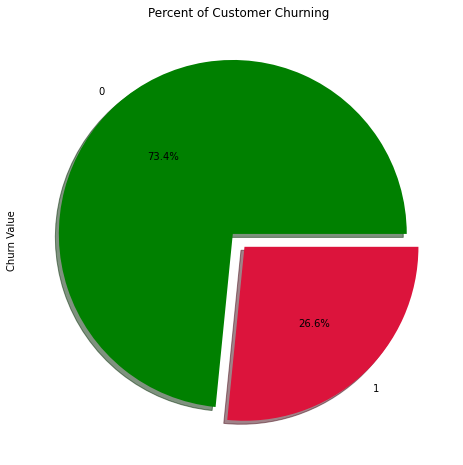

In [18]:
c=["green","crimson"]
churn_df['Churn Value'].value_counts().plot.pie(explode=[0.05, 0.05], autopct = '%1.1f%%', shadow=True,colors=c, figsize=(10,8));
plt.title("Percent of Customer Churning")
plt.show()

## 2.2Analysing the variables

In [19]:
cat_var_df = churn_df[['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support','Streaming TV', 'Streaming Movies', 
        'Contract', 'Paperless Billing', 'Payment Method']]

In [20]:
l = list()
for col in cat_var_df.columns:
    l.append(cat_var_df[col].value_counts().to_frame())

# assign the list into a dataframe    
cat_var_dfnew = pd.DataFrame({'values':l})
cat_var_dfnew

,values
0,Gender Male 3549 Female 3483
1,Senior Citizen No 5890 Yes ...
2,Partner No 3639 Yes 3393
3,Dependents No 5412 Yes 1620
4,Phone Service Yes 6352 No ...
5,Multiple Lines No ...
6,Internet Service Fiber optic ...
7,Online Security No ...
8,Online Backup No ...
9,Device Protection No ...


### 2.2.1 Analysing Demographics

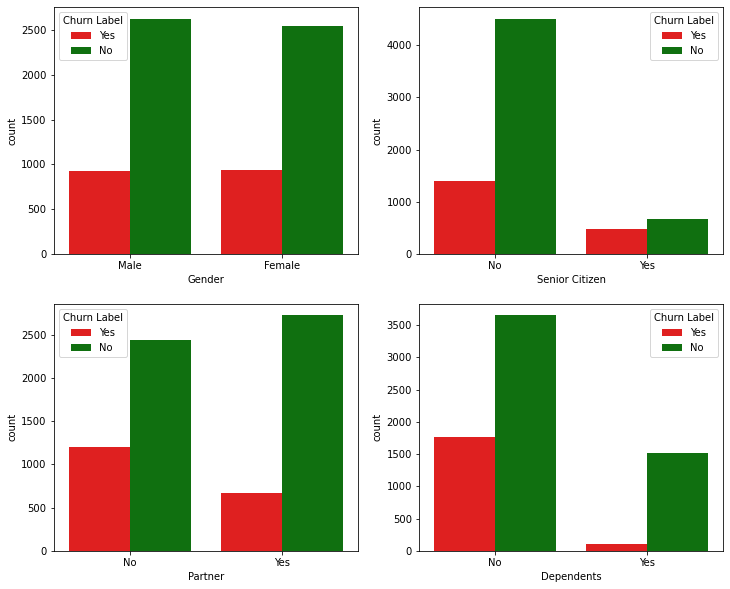

In [27]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
from cycler import cycler
plt.rc('axes', prop_cycle=(cycler('color', ['red', 'green'])))
# plot count of Gender for both churning and not churning
sb.countplot(x='Gender', hue='Churn Label', data = churn_df,ax=ax[0,0])
# plot count of Senior citizen for both churning and not churning
sb.countplot(x='Senior Citizen', hue='Churn Label', data = churn_df,ax=ax[0,1])
# plot count of partner for both churning and not churning
sb.countplot(x='Partner', hue='Churn Label', data = churn_df,ax=ax[1,0])
# plot count ofDependents for both churning and not churning
sb.countplot(x='Dependents', hue='Churn Label', data = churn_df,ax=ax[1,1])
plt.show()
plt.show() 

### 2.2.2 Analysing Choice of Services and Payment information

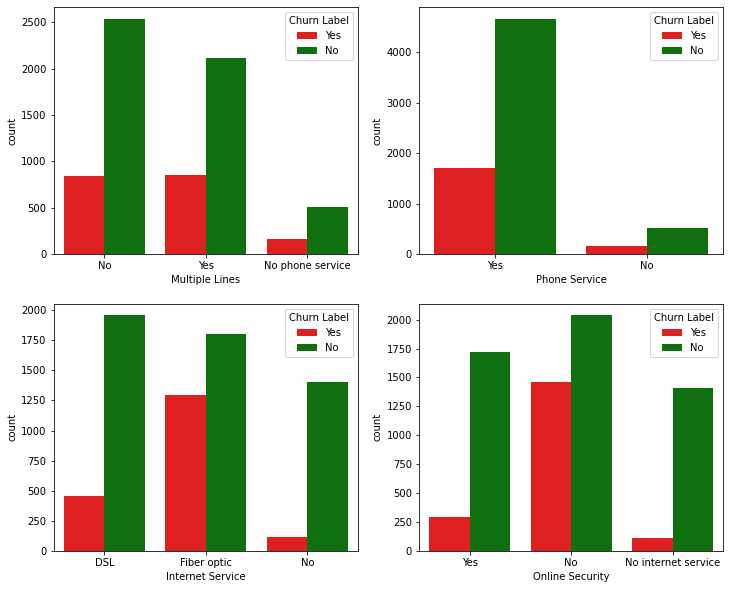

In [31]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
# plot count of Multiple Lines both churning and not churning
sb.countplot(x='Multiple Lines', hue='Churn Label',data = churn_df, ax=ax[0,0])
sb.countplot(x='Phone Service', hue='Churn Label',data = churn_df,ax=ax[0,1])
sb.countplot(x='Internet Service', hue='Churn Label',data = churn_df,ax=ax[1,0])
sb.countplot(x='Online Security', hue='Churn Label',data = churn_df,ax=ax[1,1])
plt.show()

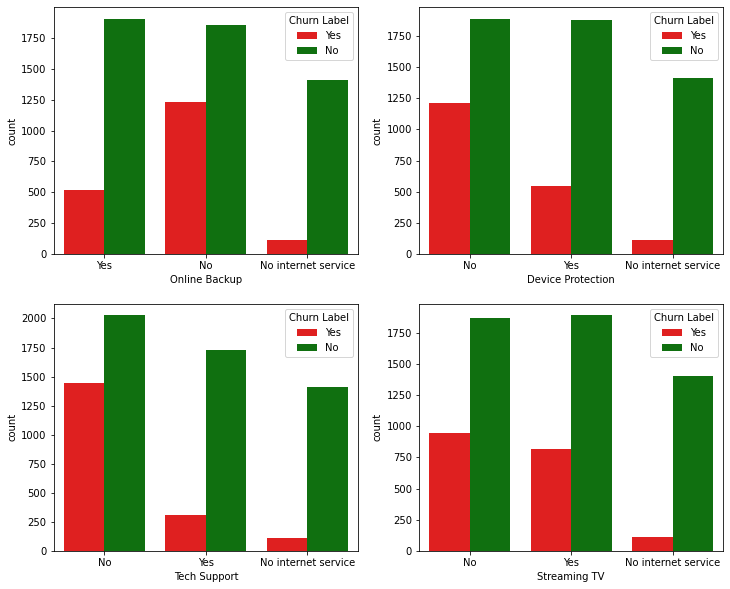

In [33]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
# plot count of Online Backup both churning and not churning
sb.countplot(x='Online Backup', hue='Churn Label', data = churn_df, ax=ax[0,0])
sb.countplot(x='Device Protection', hue='Churn Label', data = churn_df,ax=ax[0,1])
sb.countplot(x='Tech Support', hue='Churn Label', data = churn_df,ax=ax[1,0])
sb.countplot(x='Streaming TV', hue='Churn Label', data = churn_df,ax=ax[1,1])
plt.show()

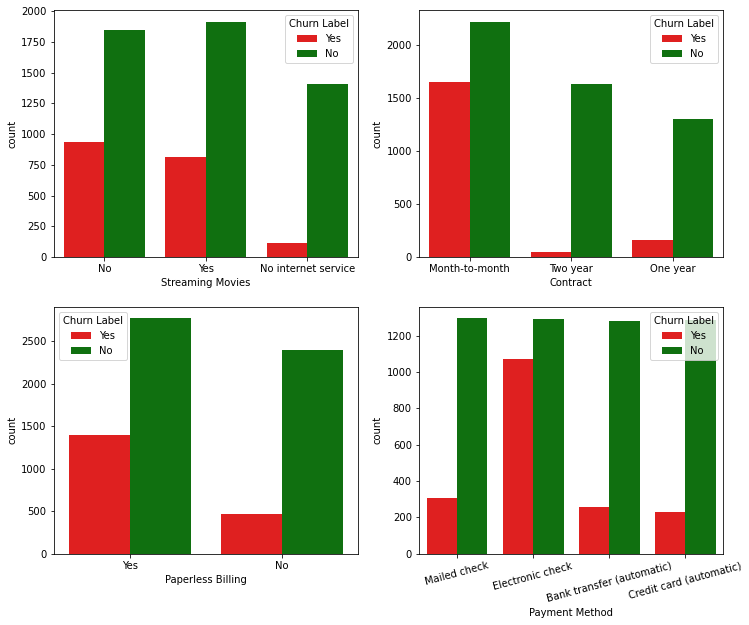

In [35]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
# plot count of Online Backup for yes and no churn label
sb.countplot(x='Streaming Movies', hue='Churn Label', data = churn_df, ax=ax[0,0])
sb.countplot(x='Contract', hue='Churn Label', data = churn_df,ax=ax[0,1])
sb.countplot(x='Paperless Billing', hue='Churn Label', data = churn_df,ax=ax[1,0])
sb.countplot(x='Payment Method', hue='Churn Label', data = churn_df,ax=ax[1,1])
plt.xticks(rotation=15) 
plt.show() 

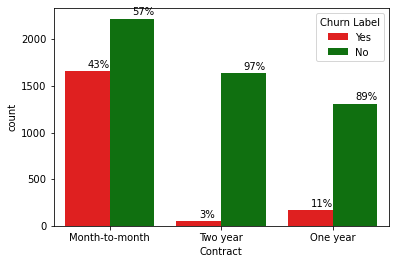

In [48]:
#displaying the percentage of yes or no for churn label in contract 
ax = sb.countplot(x='Contract', hue='Churn Label', data = churn_df)
b = ax.patches
l = int(len(b)/2)
lb = b[:l]
rb = b[l:]
for left, right in zip(lb, rb):
    hl = left.get_height();hr = right.get_height();f = hl + hr
    ax.text(left.get_x() + left.get_width()/2, left.get_height()+40, '{0:.0%}'.format(hl/f))
    ax.text(right.get_x() + right.get_width()/2, right.get_height()+40, '{0:.0%}'.format(hr/f))

### 2.2.3Analysing chrn reason

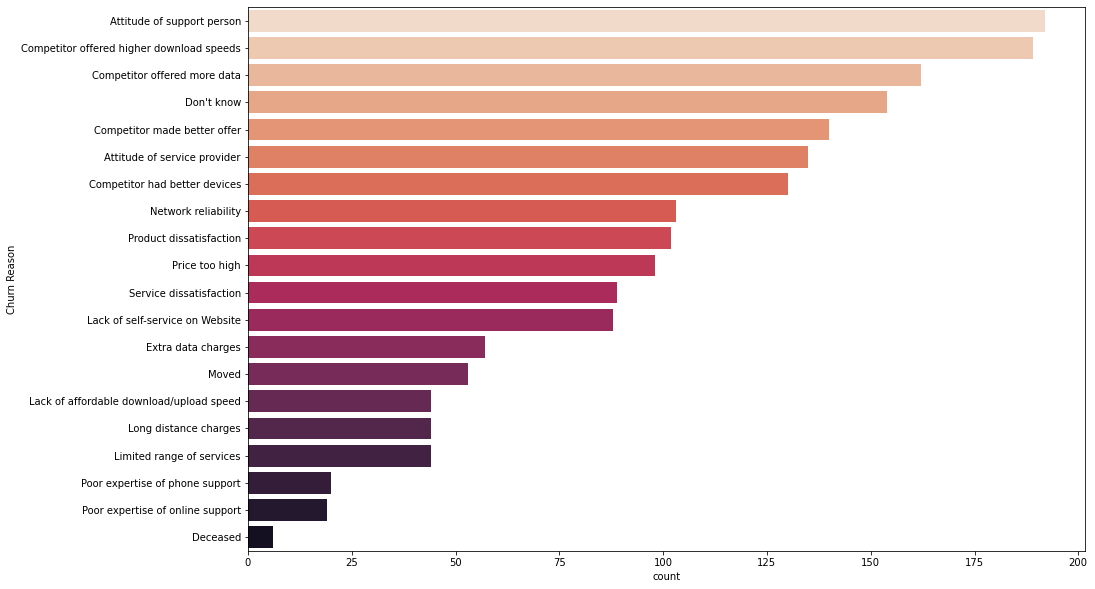

In [53]:
fig = plt.figure(figsize=(15,10))
# Plot count of Churn Reason 
sb.countplot(y= "Churn Reason", data=churn_df, palette="rocket_r", order= churn_df["Churn Reason"].value_counts().index)
plt.show()

## 2.3Analysing numerical variables

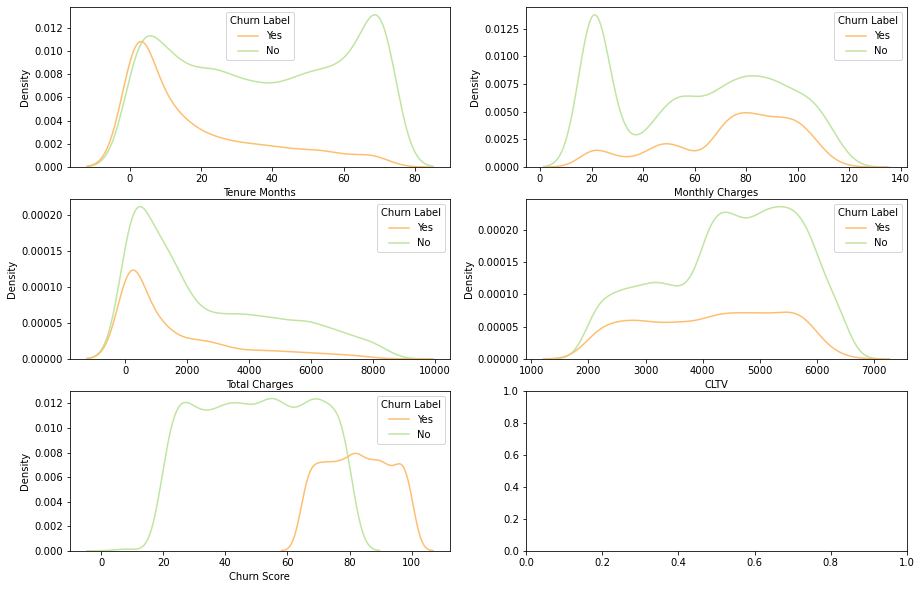

In [59]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
# plotting distributuion of Tenure Months, Monthly Charges, Total Charges, CLTV
sb.kdeplot(x='Tenure Months', hue='Churn Label', data=churn_df, palette ="Spectral", ax=ax[0,0])
sb.kdeplot(x='Monthly Charges', hue='Churn Label', data=churn_df, palette ="Spectral", ax=ax[0,1])
sb.kdeplot(x='Total Charges', hue='Churn Label', data=churn_df, palette ="Spectral", ax=ax[1,0])
sb.kdeplot(x='CLTV', hue='Churn Label', data=churn_df, palette ="Spectral", ax=ax[1,1])
#plotting distributuion of churn score
sb.kdeplot(x='Churn Score', hue='Churn Label', data=churn_df, palette ="Spectral", ax=ax[2,0])
plt.show() 

## 2.4dealing the outliers

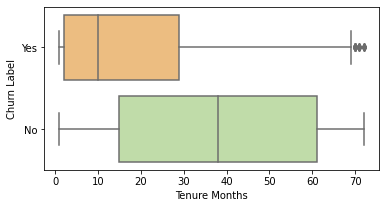

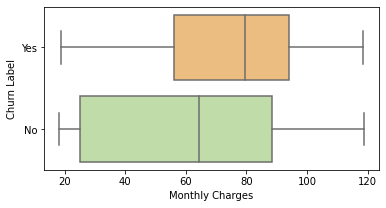

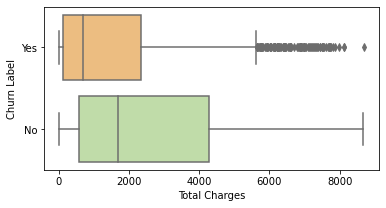

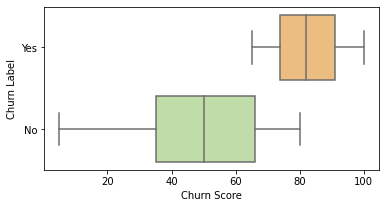

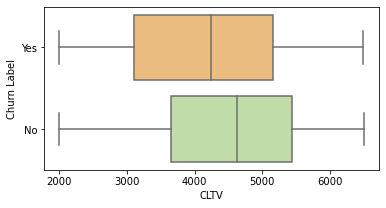

In [56]:
nv = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV']
for col in nv:
    fig = plt.figure(figsize=(6,3))
    sb.boxplot(data = churn_df, x = col, y = 'Churn Label', palette = 'Spectral')

In [135]:
churn_df[(churn_df['Churn Label'] == 'Yes') & (churn_df['Tenure Months'] > 70)].T

,248,793,815,901,1026,1091,1182,1206,1509,1662,1691,1696
Gender,Male,Male,Male,Male,Female,Male,Female,Male,Male,Female,Male,Female
Senior Citizen,No,No,No,Yes,No,No,Yes,No,Yes,No,No,No
Partner,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
Dependents,No,No,No,No,No,No,No,No,No,No,No,No
Tenure Months,71,71,72,72,72,71,72,72,71,71,71,72
Phone Service,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No
Multiple Lines,Yes,Yes,Yes,Yes,Yes,No phone service,Yes,Yes,Yes,Yes,Yes,No phone service
Internet Service,Fiber optic,Fiber optic,Fiber optic,Fiber optic,Fiber optic,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,Fiber optic,DSL
Online Security,Yes,No,No,No,No,No,Yes,Yes,Yes,No,No,No
Online Backup,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes


## 2.5 Finding the correlation in numerical variables

<AxesSubplot:>

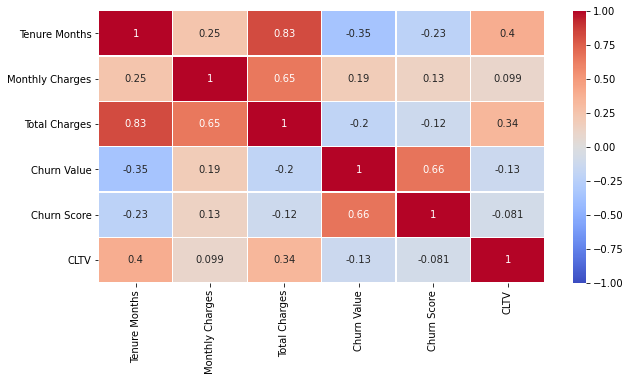

In [38]:
plt.figure(figsize=(10,5))
cor = churn_df.corr()
# plot heat map of correlation 
sb.heatmap(cor, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1) 

In [63]:
df_new = churn_df.drop(['Churn Label', 'Churn Reason'], axis=1)
train, test = train_test_split(df_new, test_size=0.3, random_state=101)

# 3.Data preprocessing

## 3.1 One hot encoding

In [65]:
v = ['Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service',
       'Online Backup', 'Tech Support', 'Streaming Movies',
       'Paperless Billing', 'Payment Method','Contract','Online Security', 'Streaming TV' , 'Device Protection']

# one hot encoding on both trainset and testset
train_new = pd.get_dummies(train, columns=v, drop_first=True)
test_new = pd.get_dummies(test, columns=v, drop_first=True)

<AxesSubplot:>

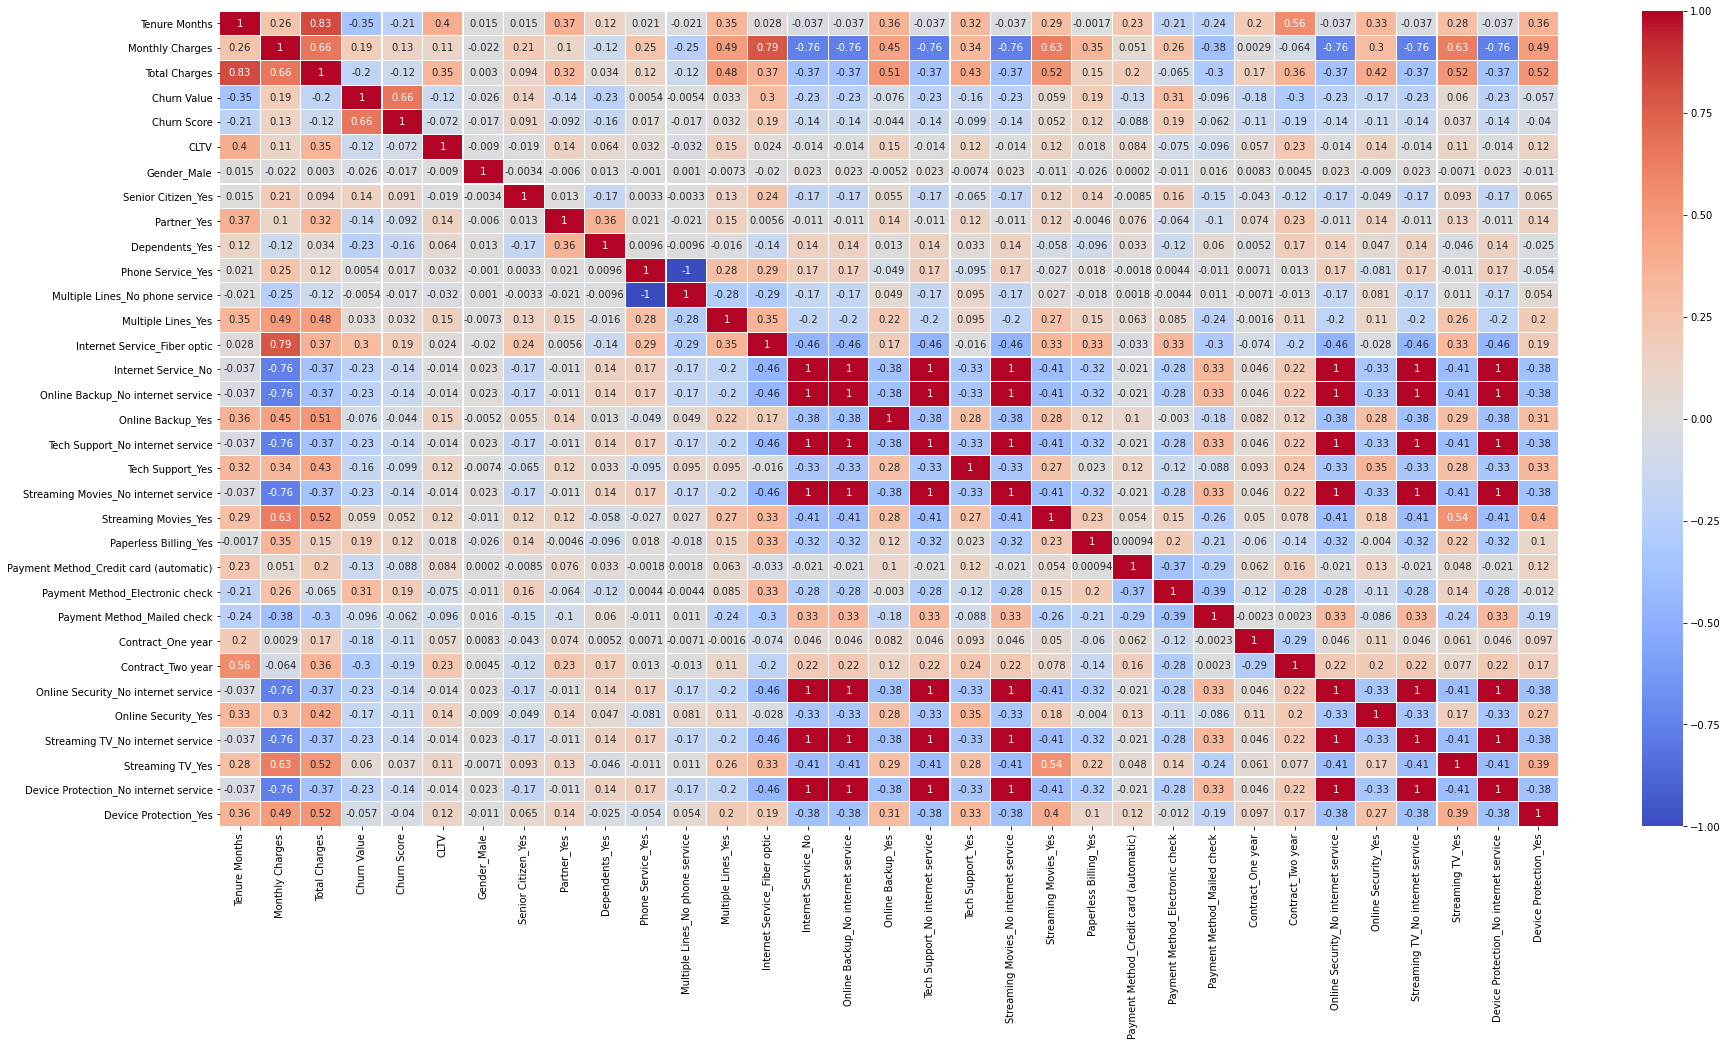

In [73]:
plt.figure(figsize=(30, 15))
cor2 = train_new.corr()
# plot heat map of correlation 
sb.heatmap(cor2, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

## 3.2Feature selection and scaling

In [76]:
x_train = train_new.drop('Churn Value', axis =1)
y_train = train_new['Churn Value']

x_test = test_new.drop('Churn Value', axis =1)
y_test = test_new['Churn Value']
print(x_train.shape)
print(x_test.shape)

(4922, 32)
(2110, 32)


In [77]:
# Oversampling both trainset and testset
x_train, y_train = SMOTE().fit_resample(x_train, y_train)
x_test, y_test = SMOTE().fit_resample(x_test, y_test)
# check that oversampling was successful using value count on dependent variable
y_train.value_counts()

0    3643
1    3643
Name: Churn Value, dtype: int64

In [78]:
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

# 4.Model building

## 4.1Logistic Regression Model

In [79]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred_logreg = log_reg.predict(x_test)

In [80]:
log_reg_accuracy=accuracy_score(y_test, y_pred_logreg)
print(log_reg_accuracy)

0.9345394736842105


In [81]:
cm_logreg = metrics.confusion_matrix(y_test, y_pred_logreg)
cm_logreg
print(classification_report(y_test, y_pred_logreg))
print(cm_logreg)

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1520
           1       0.92      0.95      0.94      1520

    accuracy                           0.93      3040
   macro avg       0.94      0.93      0.93      3040
weighted avg       0.94      0.93      0.93      3040

[[1395  125]
 [  74 1446]]


In [82]:
log_reg_f1 = f1_score(y_test, y_pred_logreg)
log_reg_f1

0.935619540601747

## 4.2Random Forest Model

In [83]:
r = RandomForestClassifier()
r.fit(x_train, y_train)
y_pred_r = r.predict(x_test)

In [84]:
r_accuracy = accuracy_score(y_test, y_pred_r)
print(r_accuracy)
print(classification_report(y_test, y_pred_r))
r_cm = confusion_matrix(y_test, y_pred_r)
print(r_cm)

0.9398026315789474
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1520
           1       0.93      0.95      0.94      1520

    accuracy                           0.94      3040
   macro avg       0.94      0.94      0.94      3040
weighted avg       0.94      0.94      0.94      3040

[[1408  112]
 [  71 1449]]


In [85]:
r_f1 = f1_score(y_test, y_pred_r)
r_f1

0.9406037000973709

## 4.3Decision Tree model

In [86]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train, y_train)
y_pred_dec_tree = dec_tree.predict(x_test)

In [87]:
dec_tree_accuracy = accuracy_score(y_test, y_pred_dec_tree)
print(dec_tree_accuracy)
print(classification_report(y_test, y_pred_dec_tree))
dec_tree_cm = confusion_matrix(y_test, y_pred_dec_tree)
print(dec_tree_cm)

0.9213815789473684
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1520
           1       0.92      0.92      0.92      1520

    accuracy                           0.92      3040
   macro avg       0.92      0.92      0.92      3040
weighted avg       0.92      0.92      0.92      3040

[[1402  118]
 [ 121 1399]]


In [88]:
dec_tree_f1 = f1_score(y_test, y_pred_dec_tree)
dec_tree_f1

0.9213039183404677

## 4.4K-Nearest Neighbor Model

In [89]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

In [90]:
k_accuracy = accuracy_score(y_test, y_pred_knn)
print(k_accuracy)
print(classification_report(y_test, y_pred_knn))
k_cm = confusion_matrix(y_test, y_pred_knn)
print(k_cm)

0.844078947368421
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1520
           1       0.82      0.89      0.85      1520

    accuracy                           0.84      3040
   macro avg       0.85      0.84      0.84      3040
weighted avg       0.85      0.84      0.84      3040

[[1219  301]
 [ 173 1347]]


In [91]:
k_f1 = f1_score(y_test, y_pred_knn)
k_f1

0.850378787878788

# 5. Evaluation of models

## 5.1f1 score

In [92]:
f1_df= pd.Series([log_reg_f1, r_f1, dec_tree_f1, k_f1], 
                     index=['Logistic Regression', 'Random Forest', 'Decision Tree','K-Nearest Neighbor'])
f1_df

Logistic Regression    0.935620
Random Forest          0.940604
Decision Tree          0.921304
K-Nearest Neighbor     0.850379
dtype: float64

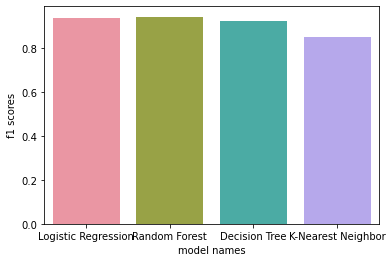

In [93]:
fig, ax = plt.subplots()
sb.barplot(x=f1_df.index, y=f1_df ,ax=ax)
plt.xlabel('model names')
plt.ylabel('f1 scores') 
plt.show()

## 5.2 Accuracy

In [94]:
accuracy_df= pd.Series([log_reg_accuracy, r_accuracy, dec_tree_accuracy, k_accuracy], 
                     index=['Logistic Regression', 'Random Forest', 'Decision Tree','K-Nearest Neighbor'])
accuracy_df

Logistic Regression    0.934539
Random Forest          0.939803
Decision Tree          0.921382
K-Nearest Neighbor     0.844079
dtype: float64

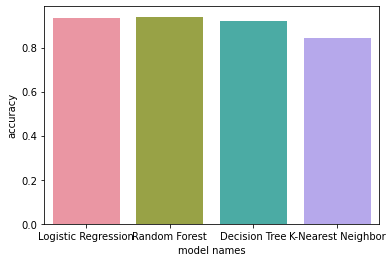

In [95]:
fig, ax = plt.subplots()
sb.barplot(x=accuracy_df.index, y=accuracy_df ,ax=ax)
plt.xlabel('model names') #add ylabel
plt.ylabel('accuracy') # add xlabel
#plt.xticks(rotation=15) #rotate xlabels to fit
plt.show()

## 5.3 Confusion matrices

### 5.3.1 confusion matrix of Logistic regression model

<AxesSubplot:>

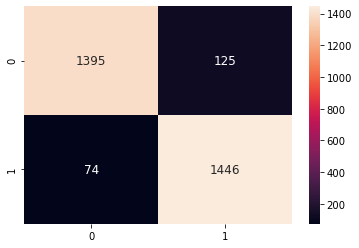

In [98]:
sb.heatmap(cm_logreg, annot=True,annot_kws={"size": 12},fmt='g')

### 5.3.2confusion matrix of random forest

<AxesSubplot:>

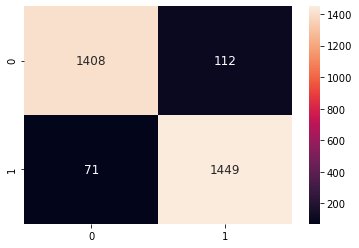

In [99]:
sb.heatmap(r_cm, annot=True,annot_kws={"size": 12},fmt='g')

### 5.3.3confusion matrix of decision tree

<AxesSubplot:>

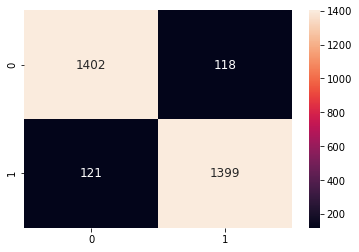

In [100]:
sb.heatmap(dec_tree_cm, annot=True,annot_kws={"size": 12},fmt='g')

### 5.3.2confusion matrix of k-nearesr neibor

<AxesSubplot:>

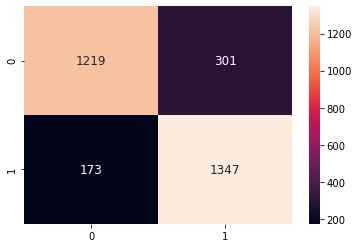

In [101]:
sb.heatmap(k_cm, annot=True,annot_kws={"size": 12},fmt='g')